<span style="font-size:30px; color:brown"> Multi-class Classifier -- K-Nearest Neighbor </span>

In [15]:
# Import needed packages for classification
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Import packages for visualization of results
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from mlxtend.plotting import plot_decision_regions

# Iport packages for evaluation
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [16]:
!ls
!cd code0404
!pwd

BeanClassifier_KNN.ipynb Dry_Bean_Dataset.csv
zsh:cd:1: no such file or directory: code0404
/Users/dingdingjiang/LABS/ds_python/code0404


In [17]:
# Read data, clean up names
beans = pd.read_csv('Dry_Bean_Dataset.csv')
beans['Class'] = beans['Class'].str.capitalize()
beans.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,Seker
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,Seker
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,Seker
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,Seker
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,Seker


In [18]:
beans.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860154,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


## A research question: 
Can we predict the class of beans based on MajorAxisLength and MinorAxisLength?

## Data Splitting

In [21]:

# Split data
X = beans[['MajorAxisLength', 'MinorAxisLength']]
y = beans[['Class']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X_train[:3]

,MajorAxisLength,MinorAxisLength
7805,277.615485,183.521216
3570,566.968178,384.118883
1686,257.030418,220.511271


In [22]:
y_train[:3]

,Class
7805,Sira
3570,Bombay
1686,Seker


## Feature Scaling for the features in X_train

In [24]:
# Scale data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test) # Note: we only transform the test set, not fit it again.
print(type(X_train_scaled))
X_train_scaled[:3]

<class 'numpy.ndarray'>


array([[-0.50323093, -0.42399839],
       [ 2.85475271,  3.97675776],
       [-0.74212388,  0.38749766]])

 
### Note 
that in the code below (as seen in the above cell)  
```python
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
```

we apply both `fit` and `tranform` on the training data: `scaler.fit_transform(X_train)`, whereas for testing data, we apply `transform()` only. 

Why?

🔹 `fit_transform()` does two things:

- `fit()`: calculates the mean and standard deviation from the data.
- `transform()`: applies the scaling using the learned stats.

🔹 `transform()` alone just applies scaling using previously learned parameters.
 

If we do the following
`X_test_scaled = scaler.**fit_transform**(X_test)`

- The test data (X_test) will have different scaling than the training data (X_train) because it’s using its own mean and standard deviation. This can lead to inaccurate results since the test data is not transformed in the same way as the training data.

- Also, The test data represents **new, unseen data** that simulates real-world data. If we fit a scaler on the test data as well, we incorporate information from the test set (unseen data) into the model pipeline, introducing data leakage in the testing stage -- the model sees stats(mean/std) it wouldn't have access to in the real world.

## Preparing output in the training set (y_train)

#### Note: we use `np.ravel()` to convert the `y_train` DataFrame to a 1D array.
#### This is necessary because the KNeighborsClassifier expects a 1D array for the target variable.

In [27]:
y_train[:3]

,Class
7805,Sira
3570,Bombay
1686,Seker


In [28]:
y_train_ravel = np.ravel(y_train)
print(type(y_train_ravel))
y_train_ravel[:3]

<class 'numpy.ndarray'>


array(['Sira', 'Bombay', 'Seker'], dtype=object)

## Model Fitting

In [30]:
# Initialize model
beanKnnClassifier = KNeighborsClassifier(n_neighbors=5)

# Fit model to training data
#beanKnnClassifier.fit(X_train_scaled, y_train) #y_train is a DataFrame, not a Series, will get a warning. It still works because the model can handle DataFrames.
beanKnnClassifier.fit(X_train_scaled, np.ravel(y_train))

KNeighborsClassifier()

In [31]:
y_pred = beanKnnClassifier.predict(X_test_scaled) #Note: Dont forget to apply the scaled test set.
y_pred[:10]

array(['Sira', 'Dermason', 'Barbunya', 'Dermason', 'Dermason', 'Seker',
       'Dermason', 'Dermason', 'Cali', 'Bombay'], dtype=object)

In [32]:
y_test[:3]

,Class
8998,Sira
7535,Sira
3292,Barbunya


In [33]:
y_pred[:3]

array(['Sira', 'Dermason', 'Barbunya'], dtype=object)

## Prediction

In [35]:
# Predict one bean
bean = pd.DataFrame(data={'MajorAxisLength': [400], 'MinorAxisLength': [200]})
beanKnnClassifier.predict(scaler.transform(bean))

array(['Horoz'], dtype=object)

## Performance Evaluation
https://scikit-learn.org/dev/modules/generated/sklearn.metrics.accuracy_score.html

https://scikit-learn.org/1.5/modules/generated/sklearn.metrics.confusion_matrix.html

In [37]:
# Compute metrics
#print(metrics.accuracy_score(y_pred, y_test))   #incorrect argument order
#print(metrics.confusion_matrix(y_pred, y_test)) #incorrect argument order
print('accuracy: ', metrics.accuracy_score(y_test, y_pred)) #be careful with the order of arguments.
print('\nconfusion matrix:\n')
print(metrics.confusion_matrix(y_test, y_pred))

accuracy:  0.8704701273261508

confusion matrix:

[[278   0  95   0   0   5  19]
 [  0 139   0   0   0   0   0]
 [ 72   0 380   0  11   1   3]
 [  0   0   0 990   1  23  92]
 [  3   0   9   5 566   0  21]
 [  2   0   0  16   0 567  15]
 [  3   0   1 105  10  17 635]]


In [38]:
beans['Class'].unique()

array(['Seker', 'Barbunya', 'Bombay', 'Cali', 'Horoz', 'Sira', 'Dermason'],
      dtype=object)

In [39]:
# Compute metrics
#Alternatively, use named arguments (keyword argument)
print(metrics.accuracy_score(y_true = y_test, y_pred = y_pred)) #be careful with the order of arguments.
print(metrics.confusion_matrix(y_pred = y_pred, y_true = y_test))

0.8704701273261508
[[278   0  95   0   0   5  19]
 [  0 139   0   0   0   0   0]
 [ 72   0 380   0  11   1   3]
 [  0   0   0 990   1  23  92]
 [  3   0   9   5 566   0  21]
 [  2   0   0  16   0 567  15]
 [  3   0   1 105  10  17 635]]


## Visualizing the regions of classification

In [41]:
# Take a sample to keep runtime low while seeing what areas are classified as each bean
beanSample = beans.sample(200, random_state=123) #randomly select 200 rows from beans
beanSample.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,54127.990000,865.381605,324.575264,202.770531,1.599216,0.758134,54884.245000,255.138392,0.749011,0.986699,0.868323,0.795476,0.006565,0.001682,0.636377,0.994809
std,30512.573123,225.933495,89.417657,46.635806,0.245734,0.085995,30943.202531,61.979882,0.049709,0.005112,0.062621,0.060103,0.001155,0.000596,0.095587,0.004285
min,22726.000000,550.994000,203.892624,142.389986,1.105963,0.427131,23071.000000,170.104797,0.588422,0.956634,0.670689,0.664848,0.003293,0.000700,0.442023,0.969040
25%,36224.750000,704.808250,256.953182,173.406526,1.431583,0.715583,36561.750000,214.761800,0.713677,0.985245,0.819555,0.759451,0.005897,0.001120,0.576766,0.993542
50%,45035.500000,798.344000,298.759333,191.330168,1.570727,0.771155,45534.500000,239.459747,0.758957,0.988034,0.879373,0.796584,0.006696,0.001651,0.634546,0.996236
75%,63414.750000,981.381000,383.678223,216.577589,1.722959,0.814333,64208.000000,284.151661,0.786572,0.989729,0.917764,0.834575,0.007363,0.002170,0.696515,0.997552
max,191042.000000,1693.703000,648.057449,389.461020,2.241201,0.894939,193440.000000,493.195934,0.840000,0.993906,0.986812,0.949719,0.008972,0.003127,0.901966,0.999674


In [42]:
beanSample.head(3)

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
10676,27381,610.721,220.244385,158.644608,1.388288,0.693651,27756,186.715216,0.747257,0.986489,0.922515,0.847764,0.008044,0.002563,0.718703,0.997767,Dermason
9185,46575,805.749,292.416239,203.530556,1.436719,0.718012,47067,243.518237,0.713826,0.989547,0.901495,0.832779,0.006278,0.001863,0.693522,0.996396,Sira
3357,131488,1368.233,485.892501,345.621263,1.405852,0.702876,132905,409.164663,0.793368,0.989338,0.882624,0.842089,0.003695,0.001146,0.709114,0.996909,Bombay


### Add a new column `['Class_Int']` to create integer-valued labels for the `'Class'` column
https://pandas.pydata.org/docs/reference/api/pandas.Series.replace.html

In [44]:
# Add a new column to create integer-valued labels for plot_decision_regions()
beanSample['Class_Int'] = beanSample['Class'].replace(
    to_replace = ['Barbunya', 'Bombay', 'Cali', 'Dermason', 'Horoz', 'Seker', 'Sira'],
    value = [0, 1, 2, 3, 4, 5, 6])

beanSample.head(3)

/var/folders/9m/brj5dz214t77hy00y15pwt380000gn/T/ipykernel_77144/287118386.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  beanSample['Class_Int'] = beanSample['Class'].replace(


,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class,Class_Int
10676,27381,610.721,220.244385,158.644608,1.388288,0.693651,27756,186.715216,0.747257,0.986489,0.922515,0.847764,0.008044,0.002563,0.718703,0.997767,Dermason,3
9185,46575,805.749,292.416239,203.530556,1.436719,0.718012,47067,243.518237,0.713826,0.989547,0.901495,0.832779,0.006278,0.001863,0.693522,0.996396,Sira,6
3357,131488,1368.233,485.892501,345.621263,1.405852,0.702876,132905,409.164663,0.793368,0.989338,0.882624,0.842089,0.003695,0.001146,0.709114,0.996909,Bombay,1


In [45]:

# Define input and output features
X = beanSample[['MajorAxisLength', 'MinorAxisLength']]
y = beanSample[['Class_Int']]

# Fit model
beanKnnClassifier.fit(X, np.ravel(y))

KNeighborsClassifier()

In [46]:
X.head(3)

,MajorAxisLength,MinorAxisLength
10676,220.244385,158.644608
9185,292.416239,203.530556
3357,485.892501,345.621263


In [47]:
y.head(3)

,Class_Int
10676,3
9185,6
3357,1


/opt/homebrew/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.12/site-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


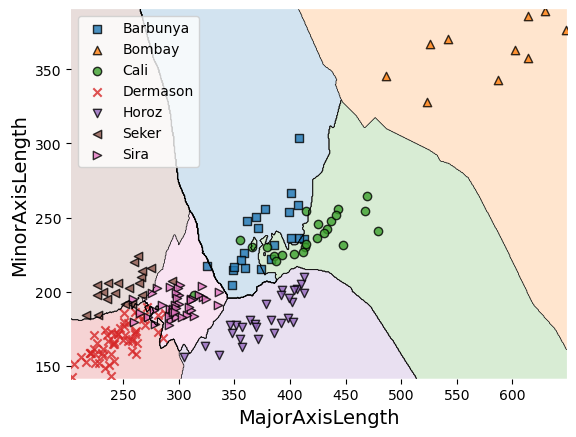

In [48]:
# Set background opacity to 20%
contourf_kwargs = {'alpha': 0.2}

# Plot decision boundary regions
p = plot_decision_regions(X.to_numpy(), np.ravel(y), clf=beanKnnClassifier, contourf_kwargs=contourf_kwargs)

# Add title and axis labels
p.set_xlabel('MajorAxisLength', fontsize=14)
p.set_ylabel('MinorAxisLength', fontsize=14)

# Add legend 
L = plt.legend()

L.get_texts()[0].set_text('Barbunya')
L.get_texts()[1].set_text('Bombay')
L.get_texts()[2].set_text('Cali')
L.get_texts()[3].set_text('Dermason')
L.get_texts()[4].set_text('Horoz')
L.get_texts()[5].set_text('Seker')
L.get_texts()[6].set_text('Sira')

### Explanation of the graph
🔧 How the Decision Boundary Is Generated:
1. Meshgrid Creation:

The function defines a grid of points that span the entire input feature space (covering all values of MajorAxisLength and MinorAxisLength).

2. Prediction Over Grid:

For each point in the grid, it calls beanKnnClassifier.predict() to determine the predicted class.

3. Region Coloring:

Each grid cell is colored based on the predicted class, forming colored decision regions.
The boundary between different color regions is where the model changes its predicted class — that's your decision boundary.

4. Contour Plotting:

Internally, contourf (filled contour) is used to shade the regions, hence contourf_kwargs.

- The colored background (regions) shows the **predicted** classes across the feature space — based on how the classifier predicts values over a meshgrid.
- The data points are plotted using the **actual (true)** class labels provided as y.